In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-prediction-dataset


In [2]:
import shutil
import os

# The path to the downloaded dataset is stored in the 'path' variable from the previous cell
destination_path = '/content/'

# Get the base name of the downloaded directory
dataset_dir_name = os.path.basename(path)

# Construct the full destination path
full_destination_path = os.path.join(destination_path, dataset_dir_name)

# Copy the directory, allowing the destination to exist
shutil.copytree(path, full_destination_path, dirs_exist_ok=True)

# Remove the original directory (optional, as it's in a read-only location)
# shutil.rmtree(path)

print(f"Dataset copied to: {full_destination_path}")

Dataset copied to: /content/loan-approval-prediction-dataset


## Load dataset

Load the dataset from the specified path into a pandas DataFrame.


In [3]:
import pandas as pd
import os

file_path = os.path.join('/content/loan-approval-prediction-dataset', 'loan_approval_dataset.csv')
df = pd.read_csv(file_path)
display(df.head())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Basic info check

Display the basic information of the DataFrame, including data types and non-null values, and descriptive statistics for numerical columns.


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Target class analysis

Check the value counts of the target variable to assess class imbalance.


In [5]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [6]:
loan_status_counts = df[' loan_status'].value_counts()
display(loan_status_counts)

,count
loan_status,
Approved,2656
Rejected,1613


## Feature distribution analysis

Analyze the distribution of both numerical and categorical features using appropriate visualizations (histograms, box plots, bar plots).


Histograms of Numerical Features:


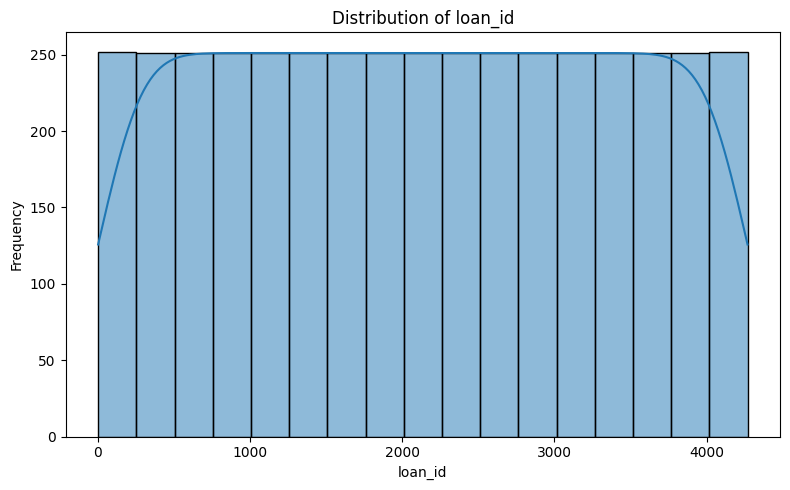

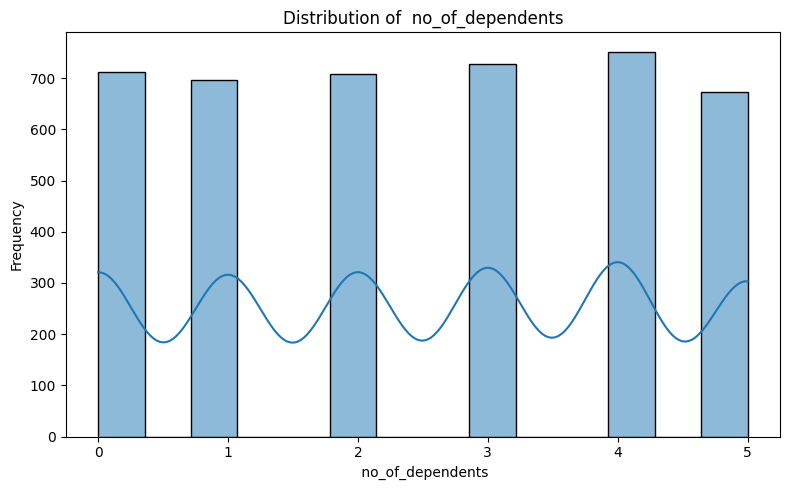

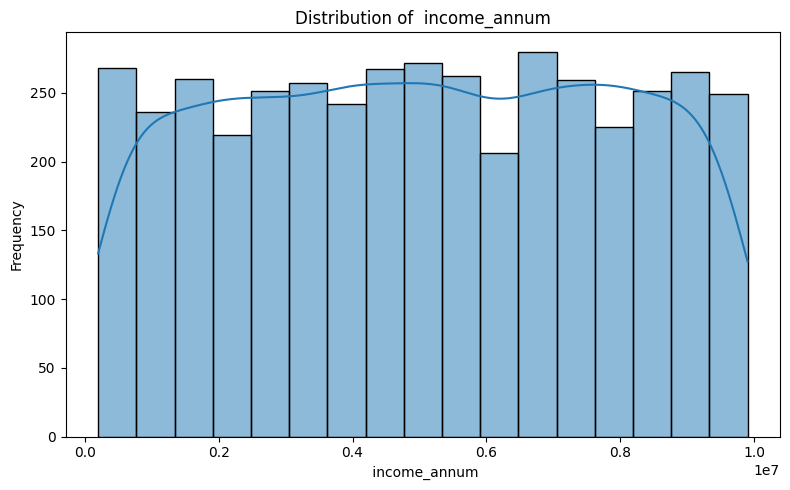

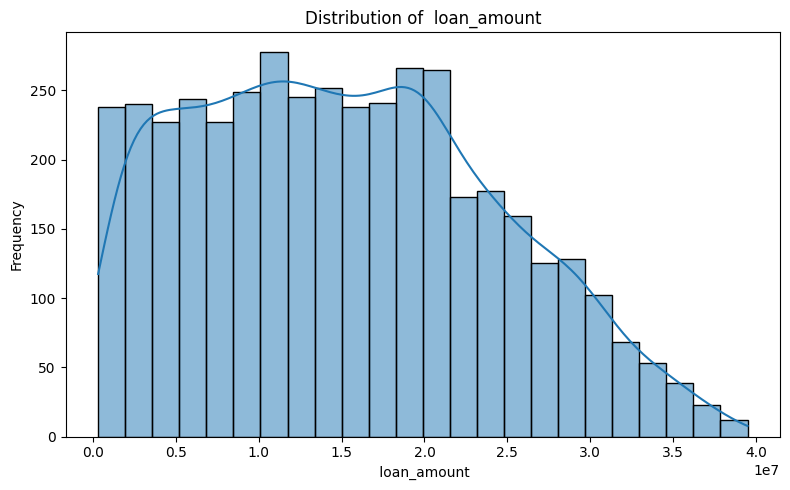

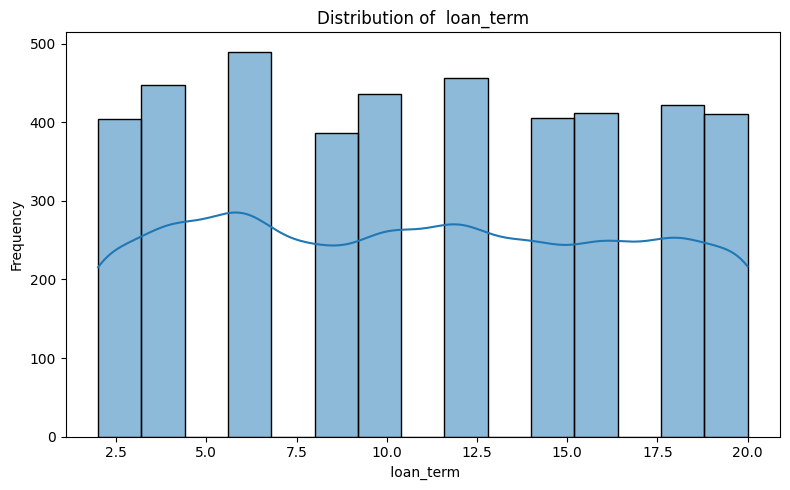

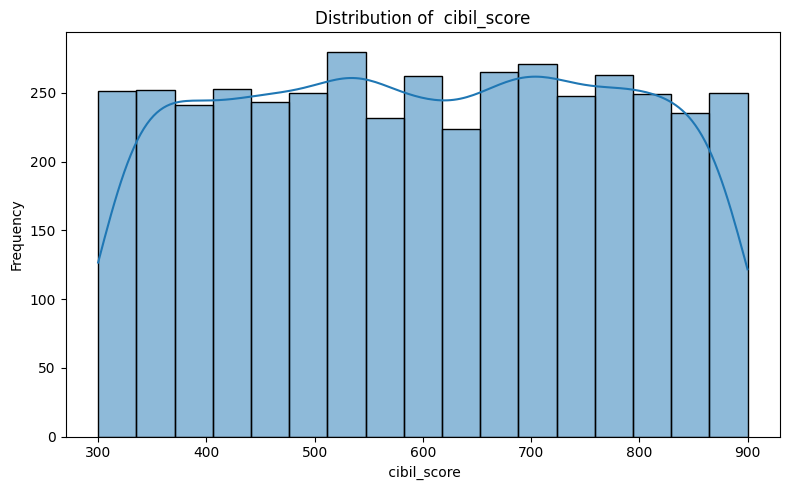

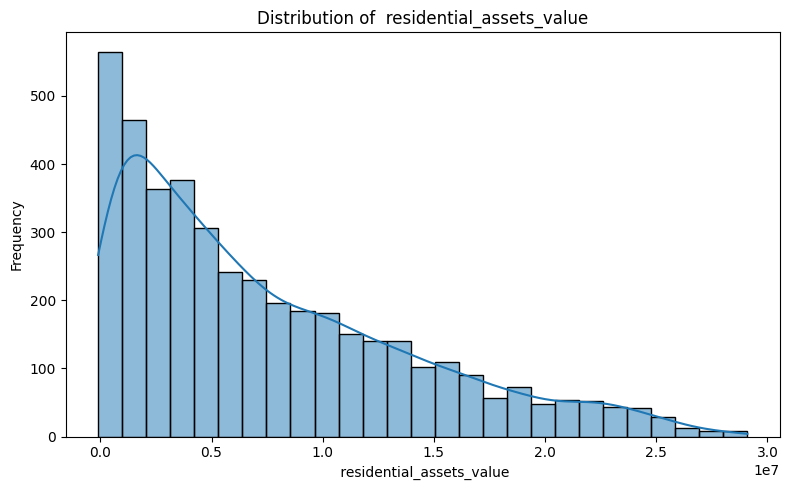

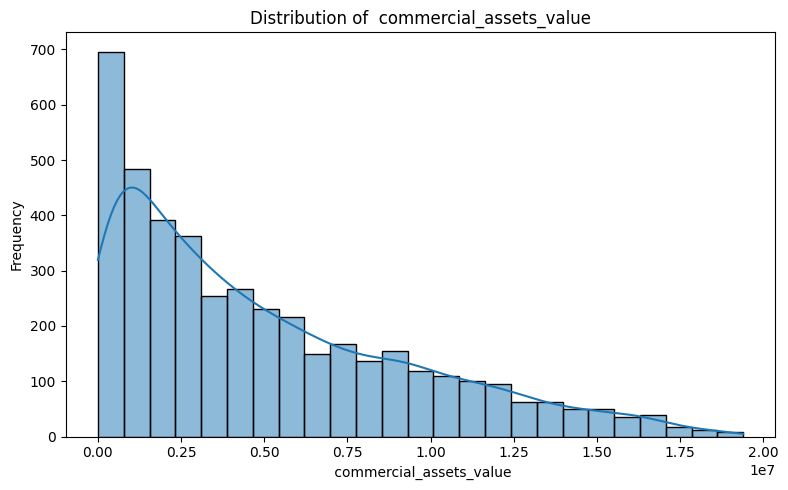

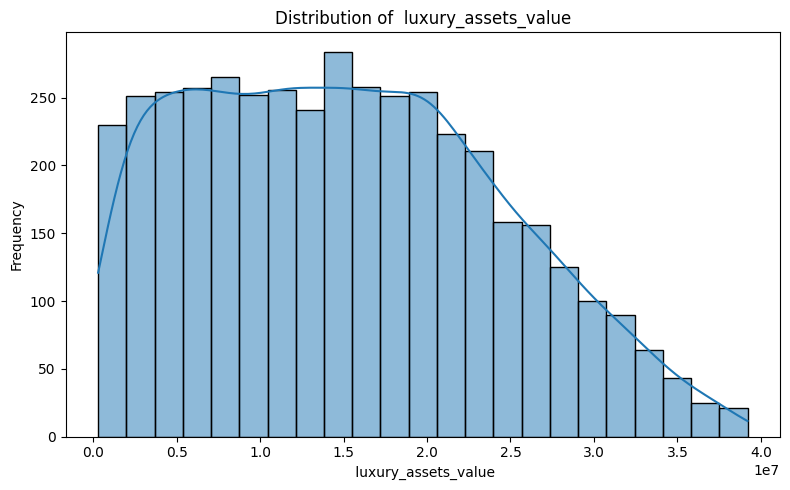

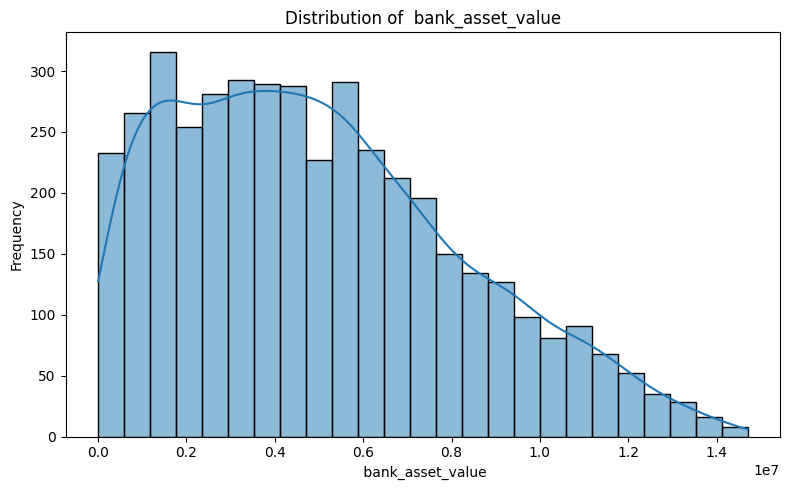


Box Plots of Numerical Features:


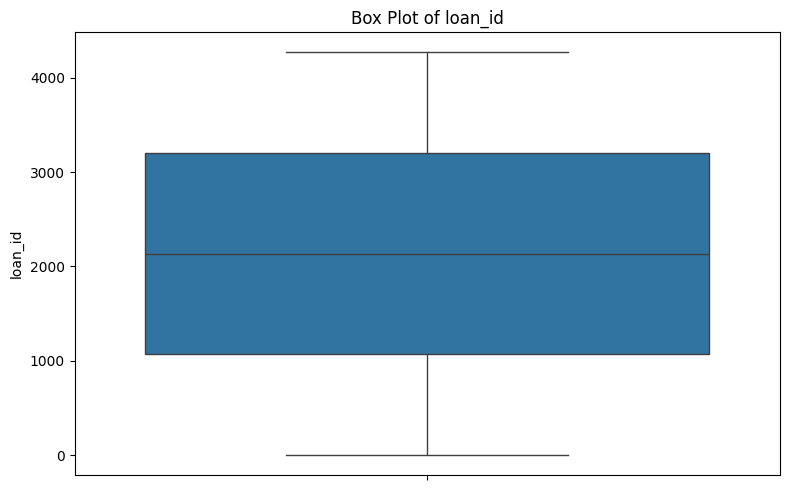

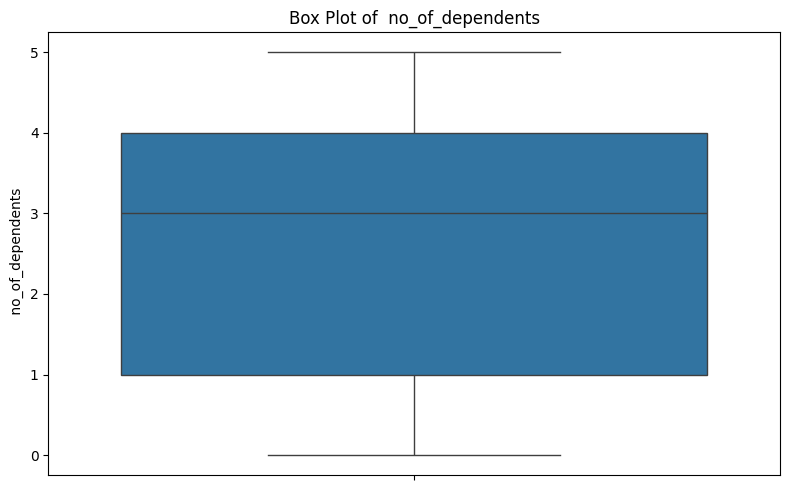

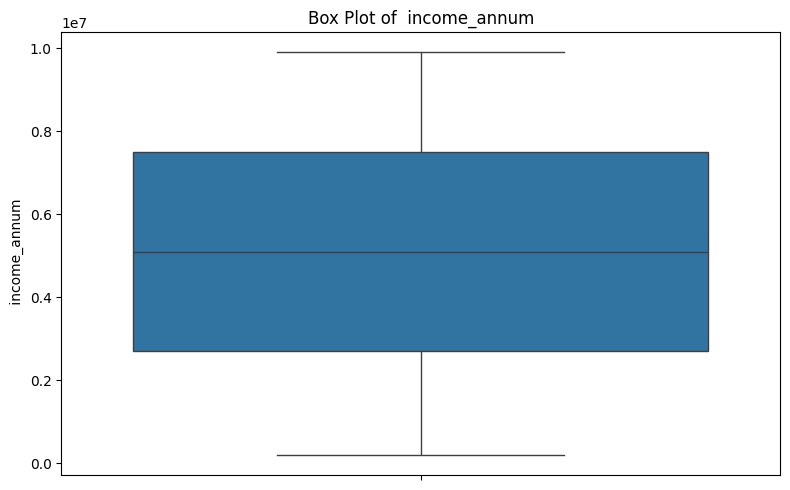

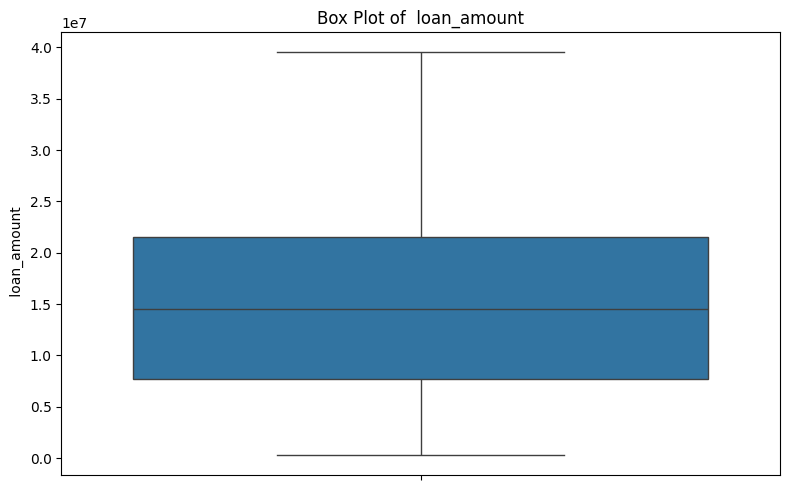

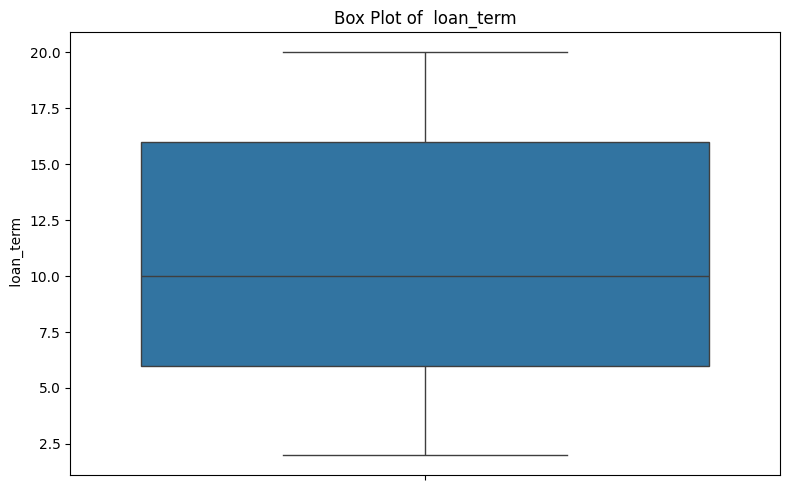

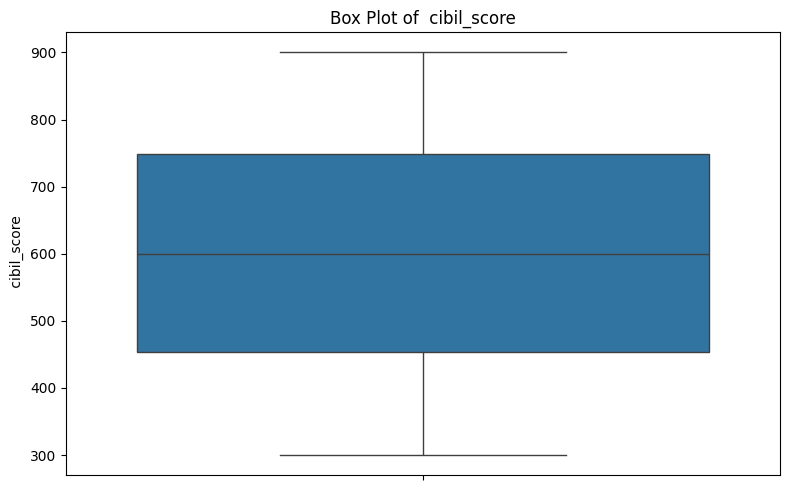

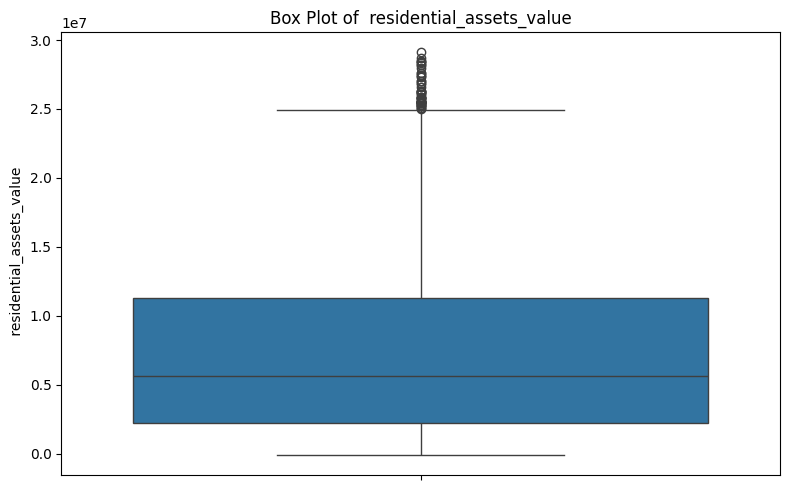

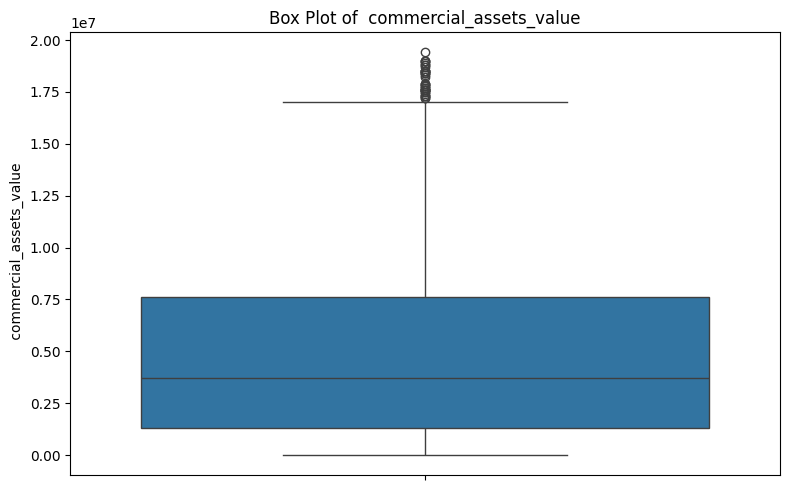

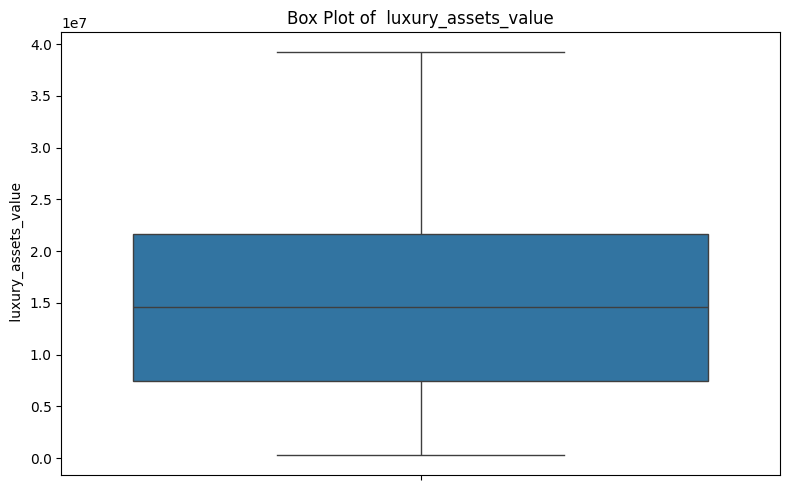

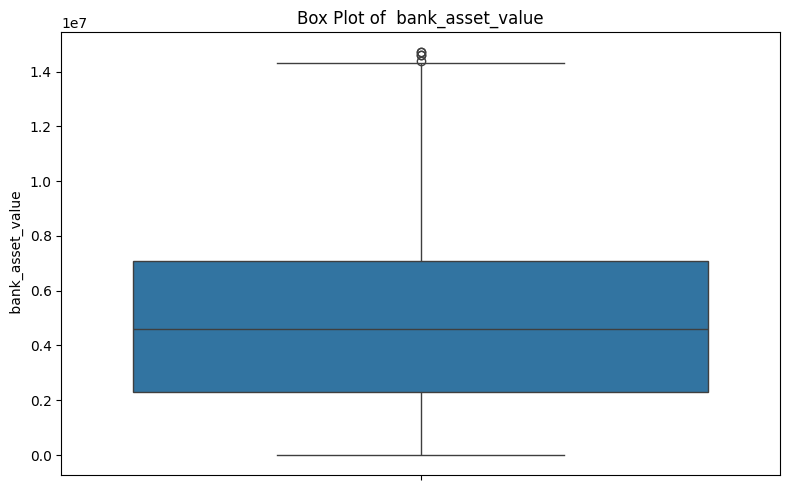


Bar Plots of Categorical Features:


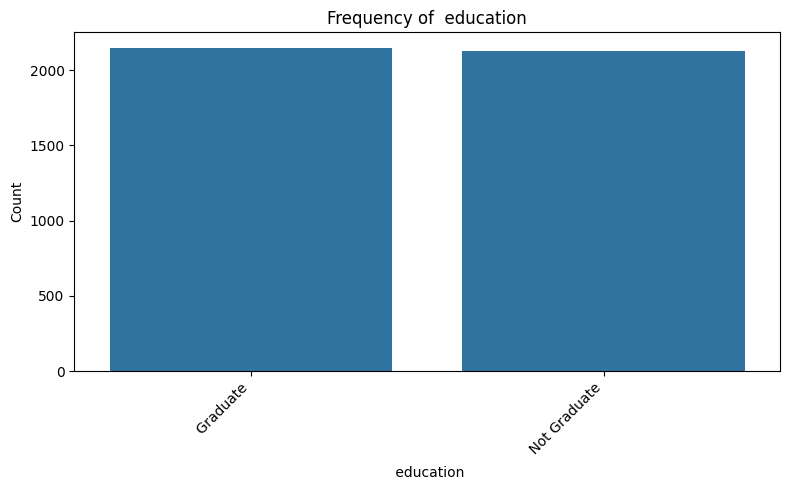

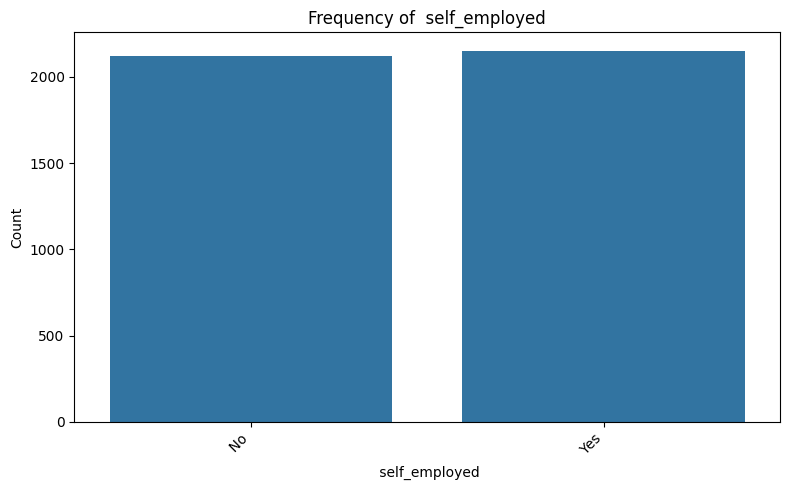

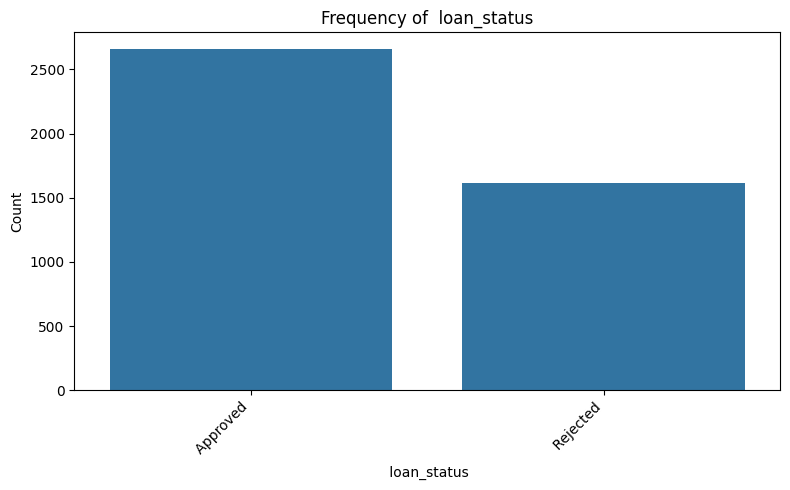

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Generate histograms for numerical columns
print("Histograms of Numerical Features:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Generate box plots for numerical columns
print("\nBox Plots of Numerical Features:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Generate bar plots for categorical columns
print("\nBar Plots of Categorical Features:")
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [8]:
# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

print("Unique values for 'education':")
display(df['education'].unique())

print("\nUnique values for 'self_employed':")
display(df['self_employed'].unique())

print("\nUnique values for 'loan_status':")
display(df['loan_status'].unique())

Unique values for 'education':


array([' Graduate', ' Not Graduate'], dtype=object)


Unique values for 'self_employed':


array([' No', ' Yes'], dtype=object)


Unique values for 'loan_status':


array([' Approved', ' Rejected'], dtype=object)

In [12]:
import pandas as pd

# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Apply label encoding to the specified columns
for col in ['education', 'self_employed', 'loan_status']:
    df[col], _ = pd.factorize(df[col])

print("DataFrame after label encoding:")
display(df.head())

DataFrame after label encoding:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [13]:
# Ensure column names are stripped of leading/trailing spaces (important if df was reloaded or modified elsewhere)
df.columns = df.columns.str.strip()

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Get the correlation with the target variable 'loan_status'
correlation_with_loan_status = correlation_matrix['loan_status'].sort_values(ascending=False)

print("Correlation with loan_status:")
display(correlation_with_loan_status)

Correlation with loan_status:


,loan_status
loan_status,1.000000
loan_term,0.113036
no_of_dependents,0.018114
luxury_assets_value,0.015465
income_annum,0.015189
residential_assets_value,0.014367
bank_asset_value,0.006778
education,0.004918
self_employed,-0.000345
commercial_assets_value,-0.008246


 I’d drop:

loan_id (it's just an identifier — always drop it)

self_employed (near-zero)

commercial_assets_value (tiny negative correlation)

loan_amount (unexpected, but it’s negatively correlated slightly)

education (adds very little signal)

bank_asset_value

residential_assets_value

luxury_assets_value

income_annum

no_of_dependents

In [14]:
# List of columns to drop
columns_to_drop = [
    'loan_id',
    'self_employed',
    'commercial_assets_value',
    'loan_amount',
    'education',
    'bank_asset_value',
    'residential_assets_value',
    'luxury_assets_value',
    'income_annum',
    'no_of_dependents'
]

# Drop the specified columns
df_dropped = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
display(df_dropped.head())

DataFrame after dropping columns:


,loan_term,cibil_score,loan_status
0,12,778,0
1,8,417,1
2,20,506,1
3,8,467,1
4,20,382,1


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features (X) and target (y)
X = df_dropped.drop(columns=['loan_status'])
y = df_dropped['loan_status']

# Initialize StandardScaler and MinMaxScaler
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standardization
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("DataFrame after Standardization:")
display(X_scaled_df.head())

# Apply Normalization (Min-Max Scaling)
X_normalized = minmax_scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("\nDataFrame after Normalization (Min-Max Scaling):")
display(X_normalized_df.head())

DataFrame after Standardization:


,loan_term,cibil_score
0,0.192617,1.032792
1,-0.508091,-1.061051
2,1.594031,-0.544840
3,-0.508091,-0.771045
4,1.594031,-1.264055



DataFrame after Normalization (Min-Max Scaling):


,loan_term,cibil_score
0,0.555556,0.796667
1,0.333333,0.195000
2,1.000000,0.343333
3,0.333333,0.278333
4,1.000000,0.136667


In [16]:
# Combine normalized features with the target variable
df_normalized_combined = pd.concat([X_normalized_df, y], axis=1)

print("Combined DataFrame after Normalization and including loan_status:")
display(df_normalized_combined.head())

Combined DataFrame after Normalization and including loan_status:


,loan_term,cibil_score,loan_status
0,0.555556,0.796667,0
1,0.333333,0.195000,1
2,1.000000,0.343333,1
3,0.333333,0.278333,1
4,1.000000,0.136667,1


In [17]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the combined normalized DataFrame
X_normalized = df_normalized_combined.drop(columns=['loan_status'])
y_normalized = df_normalized_combined['loan_status']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42, stratify=y_normalized)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3415, 2)
Shape of X_test: (854, 2)
Shape of y_train: (3415,)
Shape of y_test: (854,)


# Apply SOMTE for impalance

In [18]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)
print("\nValue counts of y_train after SMOTE:")
display(y_train_resampled.value_counts())

Shape of X_train after SMOTE: (4250, 2)
Shape of y_train after SMOTE: (4250,)

Value counts of y_train after SMOTE:


,count
loan_status,
1,2125
0,2125


## Train logistic regression

Train a Logistic Regression model on the SMOTE-resampled training data.


In [19]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model using the SMOTE-resampled training data
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

## Train decision tree

Train a Decision Tree model on the SMOTE-resampled training data.


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model using the SMOTE-resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

## Predict and evaluate

Make predictions on the test data using both trained models and evaluate their performance using relevant classification metrics (e.g., accuracy, precision, recall, F1-score, AUC).


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions with Logistic Regression
log_reg_pred = log_reg_model.predict(X_test)
log_reg_proba = log_reg_model.predict_proba(X_test)[:, 1] # Get probabilities for AUC

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Precision:", precision_score(y_test, log_reg_pred))
print("Recall:", recall_score(y_test, log_reg_pred))
print("F1-Score:", f1_score(y_test, log_reg_pred))
print("AUC:", roc_auc_score(y_test, log_reg_proba))

print("-" * 30)

# Make predictions with Decision Tree
dt_pred = dt_model.predict(X_test)
dt_proba = dt_model.predict_proba(X_test)[:, 1] # Get probabilities for AUC

# Evaluate Decision Tree
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1-Score:", f1_score(y_test, dt_pred))
print("AUC:", roc_auc_score(y_test, dt_proba))

Logistic Regression Performance:
Accuracy: 0.9437939110070258
Precision: 0.9104477611940298
Recall: 0.9442724458204335
F1-Score: 0.9270516717325228
AUC: 0.9737949893011026
------------------------------
Decision Tree Performance:
Accuracy: 0.949648711943794
Precision: 0.940251572327044
Recall: 0.9256965944272446
F1-Score: 0.9329173166926678
AUC: 0.9551141895949578


## Compare models

### Subtask:
Compare the evaluation metrics of the two models to determine which one performed better.


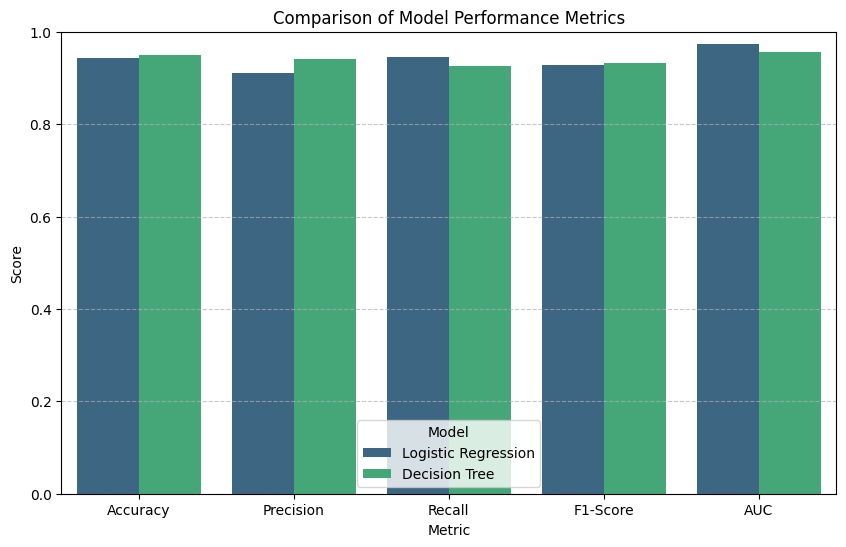

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the evaluation metrics from the previous output (replace with actual values if needed)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
log_reg_scores = [0.9437939110070258, 0.9104477611940298, 0.9442724458204335, 0.9270516717325228, 0.9737949893011026]
dt_scores = [0.949648711943794, 0.940251572327044, 0.9256965944272446, 0.9329173166926678, 0.9551141895949578]

# Create a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': log_reg_scores,
    'Decision Tree': dt_scores
})

# Reshape the DataFrame for plotting
comparison_df_melted = comparison_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Create a bar plot to compare the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) # Set y-axis limit for scores between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()